<a href="https://colab.research.google.com/github/rajitakolla/pythonCode/blob/master/hivDataAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

55
         Continent Estimated HIV Prevalence% - (Ages 15-49)  ...  2010  2011
0           Africa                                  Algeria  ...   NaN   NaN
1           Africa                                   Angola  ...   2.1   2.1
2           Africa                                    Benin  ...   1.2   1.2
3           Africa                                 Botswana  ...  23.7  23.4
4           Africa                             Burkina Faso  ...   1.2   1.1
..             ...                                      ...  ...   ...   ...
270  South America                                 Paraguay  ...   0.3   0.3
271  South America                                     Peru  ...   0.4   0.4
272  South America                                 Suriname  ...   1.1   1.0
273  South America                                  Uruguay  ...   0.6   0.6
274  South America                                Venezuela  ...   0.5   0.5

[275 rows x 36 columns]


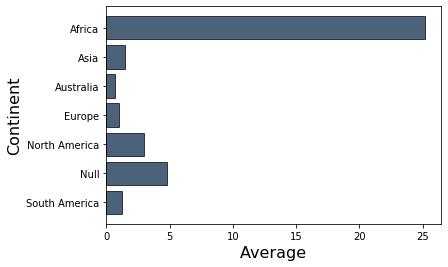

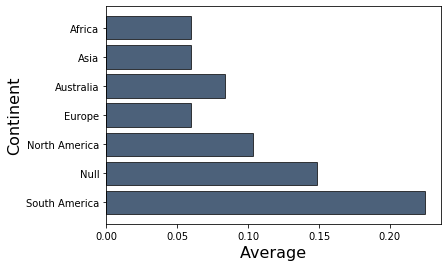

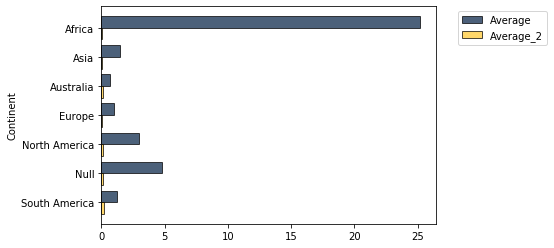

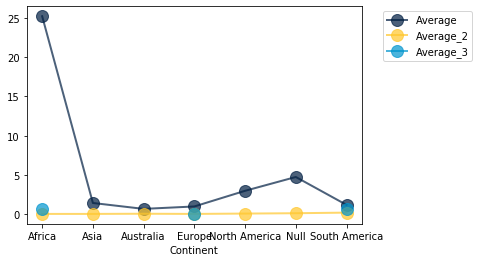

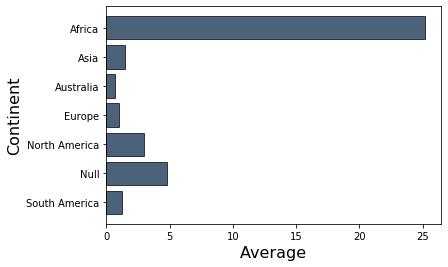

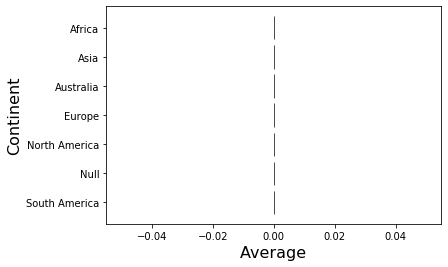

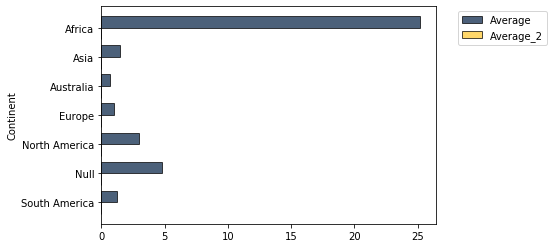

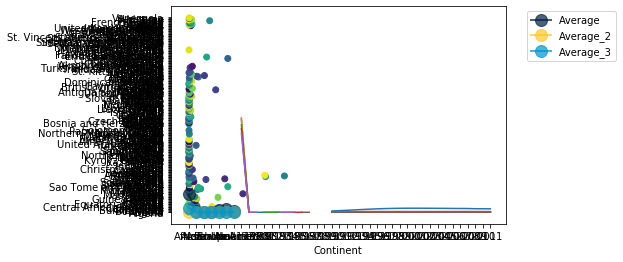

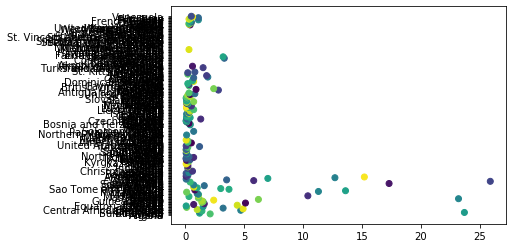

In [307]:
import pandas as  pd
import sys
import pycountry as cn
import pycountry_convert as pc
import datascience as ds
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def map_continents_with_keys():
  return {"AS":"Asia","EU":"Europe","AF":"Africa","OC":"Australia","NA":"North America","SA":"South America"}
  pass

def generateOutPutFile(dataDF,path):
  dataDF.to_csv(path)
  pass


def create_mock_dict(): 
  return dict(zip([x for x in range(1979,2012)],[str(x) for x in range(1979,2012)])) 
  pass

def draw_graph (dataDF, *args):
  dataDF.barh(*args)
  pass

def generate_Random_loc():
  return lambda obj: obj.loc[np.random.choice(obj.index, 1, True),:]
  pass

def join_operations(df1,df2, name, *args):
  return df1.join(name,df2).drop(*args)
  pass

def fetchDataSet(dataDF,*args):
  return dataDF.groupby(*args,as_index=False).mean();
  pass

def driverPrg1():
  fileName = 'indicator hiv estimated prevalence% 15-49.xlsx';
  dataDF =  pd.read_excel(fileName,"Data",header = 0)
  count=0
  continent_maps = map_continents_with_keys()
  final_dataset=[]
  for country in dataDF['Estimated HIV Prevalence% - (Ages 15-49)']:
    try:
      final_dataset.append(continent_maps[pc.country_alpha2_to_continent_code(pc.country_name_to_country_alpha2(country,cn_name_format='default'))])
    except:
      count=count+1
      final_dataset.append('Null')
      # print(sys.exc_info()[0])
  dataDF['Continent'] = final_dataset
  print(count)
  return dataDF
  pass

def driverPrg2(dataDF):
  alias_names = create_mock_dict()
  result_table = ds.Table.from_df(dataDF).select(['Estimated HIV Prevalence% - (Ages 15-49)']+[str(i) for i in range(2000,2012)]+['Continent']).groups(['Continent', 'Estimated HIV Prevalence% - (Ages 15-49)'], sum)
  interm_df = result_table.with_columns('Average', (result_table.column('2000 sum')+result_table.column('2001 sum')+result_table.column('2002 sum')+result_table.column('2003 sum')+result_table.column('2004 sum')+result_table.column('2005 sum')+result_table.column('2006 sum')+result_table.column('2007 sum')+result_table.column('2008 sum')+result_table.column('2009 sum')+result_table.column('2010 sum')+result_table.column('2011 sum'))/12).to_df()
  list_of_columns = ['Continent', 'Estimated HIV Prevalence% - (Ages 15-49)', 'Average']
  maximum = interm_df.loc[interm_df.reset_index().groupby(['Continent'])['Average'].idxmax()][list_of_columns]
  minimum = interm_df.loc[interm_df.reset_index().groupby(['Continent'])['Average'].idxmin()][list_of_columns]
  maximum_table = ds.Table.from_df(maximum)
  minimum_table = ds.Table.from_df(minimum)
  draw_graph(maximum_table,'Continent', 'Average')
  draw_graph(minimum_table,'Continent', 'Average')
  component = join_operations(maximum_table,minimum_table,'Continent',['Estimated HIV Prevalence% - (Ages 15-49)', 'Estimated HIV Prevalence% - (Ages 15-49)_2'])
  component.barh('Continent')
  column = interm_df[list_of_columns]
  high = pd.concat([column,maximum]).drop_duplicates(keep=False)
  low = pd.concat([high,minimum]).drop_duplicates(keep=False)
  random_gen = generate_Random_loc()
  group_ran = low.groupby('Continent', as_index=False).apply(random_gen)
  group_ran_tab = ds.Table.from_df(group_ran)
  random_join = join_operations(component,group_ran_tab,'Continent',['Estimated HIV Prevalence% - (Ages 15-49)']) 
  random_join.plot('Continent',marker='o',linewidth=2, markersize=12)
  pass


def driverPrg3(dataDF):
  actualDF = fetchDataSet(dataDF,['Continent'])
  continents = {"Asia","Europe","Africa","Australia","North America","South America"}
  for c_name in continents:
    plt.plot(actualDF.columns[1:], actualDF[actualDF['Continent'] == c_name].values.tolist()[0][1:])
  pass

def driverPrg4(dataDF):
  actualDF = fetchDataSet(dataDF,['Continent','Estimated HIV Prevalence% - (Ages 15-49)'])
  print(actualDF)
  plt.scatter(actualDF['1990'], 'Estimated HIV Prevalence% - (Ages 15-49)', data = actualDF, c = np.random.RandomState(0).rand(275))
  plt.show(block=False)
  plt.scatter(actualDF['2010'], 'Estimated HIV Prevalence% - (Ages 15-49)', data = actualDF, c = np.random.RandomState(0).rand(275))
  pass

def exec():
  finalDF1 = driverPrg1()
  generateOutPutFile(finalDF1,"/content/output_file.csv")
  inputDF1 = pd.read_csv("/content/output_file.csv")
  driverPrg2(inputDF1)
  inputDF2 = pd.read_csv("/content/output_file.csv").replace(np.nan, 0)
  driverPrg2(inputDF2)
  driverPrg3(inputDF1)
  driverPrg4(inputDF1)
  pass

exec()

# New Section